In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

In [3]:
def load_image(img_path):
    """Load image into a 3D numpy array
    Arg:
        img_path: string, file path of the image file.
    Return:
        imArr: numpy array with shape (height, width, 3).
    """
    with Image.open(img_path) as im:
        imArr = np.fromstring(im.tobytes(), dtype=np.uint8)
        imArr = imArr.reshape((im.size[1], im.size[0], 3))
    return imArr

def save_image(imArr, fpath='output.jpg'):
    """Save numpy array as a jpeg file
    Arg:
        imArr: 2d or 3d numpy array, *** it must be np.uint8 and range from [0, 255]. ***
        fpath: string, the path to save imgArr.
    """
    im = Image.fromarray(imArr)
    im.save(fpath)
    
def plot_curve(k, err, fpath='curve.png', show=False):
    """Save the relation curve of k and approx. error to fpath
    Arg:
        k: a list of k, in this homework, it should be [1, 5, 50, 150, 400, 1050, 1289]
        err: a list of aprroximation error corresponding to k = 1, 5, 50, 150, 400, 1050, 1289
        fpath: string, the path to save curve
        show: boolean, if True: display the plot else save the plot to fpath
    """
    plt.gcf().clear()
    plt.plot(k, err, marker='.')
    plt.title('SVD compression')
    plt.xlabel('k')
    plt.ylabel('Approx. error')
    if show:
        plt.show()
    else:
        plt.savefig(fpath, dpi=300)
    
def approx_error(imArr, imArr_compressed):
    """Calculate approximation error 
    Arg:
        Two numpy arrays
    Return:
        A float number, approximation error
    """
    v = imArr.ravel().astype(float)
    u = imArr_compressed.ravel().astype(float)
    return np.linalg.norm(v - u) / len(v)

In [4]:
def svd_compress(imArr,k):
    """Compress image array using SVD decomposition.
    Arg:
        imArr: numpy array with shape (height, width, 3).
    Return:
        Compressed imArr: numpy array.
    """
    imArr_compressed = np.zeros(imArr.shape)
    # For each channel
    for ch in range(3):
        # --------------------
        # TODO: 
        #     Compress the image array using SVD decomposition
        # hint:
        #     1. numpy.linalg.svd
        #     2. numpy.diag
        #     3. numpy.dot
        #
        # Your code here
        # imArr_compressed = ??
        # 
        # --------------------
        U,S,V = svd(imArr[:, :, ch],full_matrices = False)
        imArr_compressed[:, :, ch]= np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
        if ch == 0:
            print ("\n rank = ",np.linalg.matrix_rank(imArr_compressed[:, :, ch]))
        # Make imArr_compressed range from 0 to 255
        imArr_compressed[:, :, ch] -= imArr_compressed[:, :, ch].min()
        imArr_compressed[:, :, ch] /= imArr_compressed[:, :, ch].max()
        imArr_compressed[:, :, ch] *= 255
        # Return uint8 because save_image needs input of type uint8
    return imArr_compressed.astype(np.uint8)

In [5]:
# from hw6_r07922022 import svd_compress

img_path = 'img/vegetable_english.jpg'
imArr = load_image(img_path)

ks = [1, 5, 50, 150, 400, 1050, 1289]
err = []
for k in ks: 
    print("Perform SVD for k=%d ..." % k, end='\r')
    imArr_compressed = svd_compress(imArr, k=k)
    err += [approx_error(imArr, imArr_compressed)]
    save_image(imArr_compressed, 'result_{}.jpg'.format(k))

/Users/andrewwong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


Perform SVD for k=1 ...
 rank =  1
Perform SVD for k=5 ...
 rank =  5
Perform SVD for k=50 ...
 rank =  50
Perform SVD for k=150 ...
 rank =  150
Perform SVD for k=400 ...
 rank =  400
Perform SVD for k=1050 ...
 rank =  1050
Perform SVD for k=1289 ...
 rank =  1066


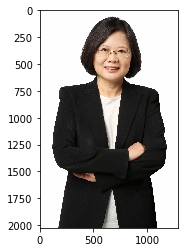

In [22]:
plt.imshow(imArr_compressed)
plt.show()

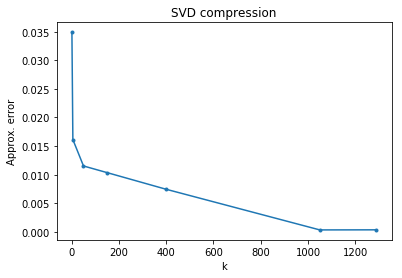

In [23]:
plot_curve(ks, err, show=True)
